# 다항 로지스틱 회귀

In [4]:
# 붓꽃 데이터 준비
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris['data'][:, [2, 3]]
y = iris['target']

# 로지스틱 회귀 다항 분류
softmax_clf = LogisticRegression(multi_class='multinomial',
                                solver='lbfgs',
                                C=10)
softmax_clf.fit(X, y)
softmax_clf.predict([[5, 2]])

array([2])

In [5]:
softmax_clf.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [6]:
LogisticRegression?

# 싸이킷런의 다양한 평가지표

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X = iris['data']
y = (iris['target'] == 2).astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, stratify=y)


In [12]:
# 분류자 평가를 위한 모듈 임포트
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [17]:
lr_clf = LogisticRegression(max_iter=1000)

y_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)
print('confusion_matrix: \n', confusion_matrix(y_train, y_pred))
print('accuracy: \n', accuracy_score(y_train, y_pred))
print('precision: \n', precision_score(y_train, y_pred))
print('recall: \n', recall_score(y_train, y_pred))
print('f1_score: \n', f1_score(y_train, y_pred))

confusion_matrix: 
 [[78  2]
 [ 3 37]]
accuracy: 
 0.9583333333333334
precision: 
 0.9487179487179487
recall: 
 0.925
f1_score: 
 0.9367088607594937


In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        80
           1       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



# ROC AUC curve

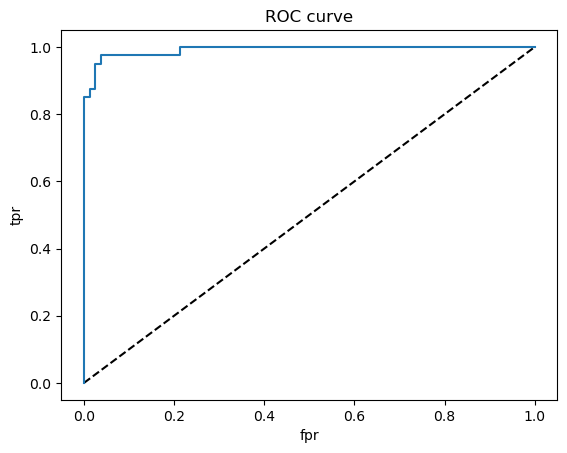

In [21]:
y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3, method='decision_function')

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# 캐글의 Telco Customer Churn 데이터

In [22]:
!dir customer*

 C 드라이브의 볼륨: System
 볼륨 일련 번호: B450-ABC2

 C:\Users\shbaek\workshop 디렉터리

2022-09-16  오후 03:54    <DIR>          customer-churn-prediction-2020
               0개 파일                   0 바이트
               1개 디렉터리  105,148,715,008 바이트 남음


In [23]:
import pandas as pd
import os
DIR='customer-churn-prediction-2020'
train_path = os.path.join(DIR, 'train.csv')
train = pd.read_csv(train_path)
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
num_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']
cat_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan']



In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    train.iloc[:,:-1], train['churn'], test_size=0.2, stratify=train['churn'])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

(3400, 19) (3400,)
(850, 19) (850,)
no     2922
yes     478
Name: churn, dtype: int64
no     730
yes    120
Name: churn, dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler
zs = StandardScaler()
X_train_zs = zs.fit_transform(X_train[num_columns])
X_test_zs = zs.transform(X_test[num_columns])
print(X_train_zs.shape, X_test_zs.shape)

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_oh = oh.fit_transform(X_train[cat_columns])
X_test_oh = oh.transform(X_test[cat_columns])
print(X_train_oh.shape, X_test_oh.shape)

import numpy as np
X_train_prep = np.concatenate([X_train_zs, X_train_oh], axis=1)
X_test_prep = np.concatenate([X_test_zs, X_test_oh], axis=1)
print(X_train_prep.shape, X_test_prep.shape)

# 라벨인코더를 이용하여 타겟레이블 중 문자열을 수치형으로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_prep = le.fit_transform(y_train)
y_test_prep = le.transform(y_test)

(3400, 15) (850, 15)
(3400, 58) (850, 58)
(3400, 73) (850, 73)


In [44]:
y_train

993      no
4098     no
1471    yes
376      no
87       no
       ... 
1803     no
3834     no
3798     no
381      no
2722     no
Name: churn, Length: 3400, dtype: object

In [47]:
y_train_prep

array([0, 0, 1, ..., 0, 0, 0])

* 비즈니스 이해
    * 문제정의: 텔코 고객 이탈 데이터를 이용하여 이동통신 서비스 이탈 여부를 예측하는 이진분류
    * 평가지표 설정: 정확도 (90%, 편중된 데이터이므로 원사이클 시행 후 수정)
* 데이터 수집
    * 캐글의 텔코 고객 이탈 데이터 활용
    * 현업에서는 직접 수집
* 데이터 탐색 전처리 정책 결정
    * 타겟레이블의 빈도를 카운트: no/yes = 6/1
    * 수치형과 범주형 데이터가 섞여있음
    * 누락값 처리는 필요없음
    * 이상치 처리는 안 하는 것이 좋다. 문제 자체가 고객 이탈이라는 이상치 예측에 해당되므로.
    * 특성 스케일링은 필요

In [50]:
# 머신러닝 알고리즘 적용
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train_prep, y_train_prep)
log_clf.score(X_test_prep, y_test_prep)

0.8588235294117647

# 훈련셋에 대해서는 OverSampling 또는 UnderSampling으로 클래스 별 비율을 맞추는 것이 필요함.